## Machine learning model that predicts which employee is most at risk of having an accident at work

A company is concerned about potential risks to its employees due to work accidents that occurred in its production process. In this context, it decides to adopt an action plan whose main objective is to reduce the risk of accidents in its plants. As a first step, it decides to conduct an analysis to investigate the main factors that may contribute to the occurrence of this event.

### Libraries used:
- pandas
- numpy
- matplotlib
- sklearn

python version used: 3.10.4

In [18]:
#--- IMPORT LIB's ---#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample


In [19]:
#--- IMPORT DATASET
df = pd.read_excel('dataset/sample_rais.xlsx')
print('O shape do DF é {}'.format(str(len(df)) + ', ' + str(len(df.columns))))

O shape do DF é 10000, 53


In [20]:
df.head()

,bairros_sp,causa_afastamento_1,causa_afastamento_2,causa_afastamento_3,motivo_desligamento,cbo,cnae_classe,distritos_sp,vinculo_ativo_31dez,faixa_etaria,...,cod_tse_municipio,nome_municipio,nome_municipio_sem_acento,ocupacao,setor,contribuinte_senai,nome_tipo_vinculo,nome_genero,nivel_escolaridade,segmentacao_escolaridade
0,9999.0,10.0,99.0,99.0,0.0,732105.0,35140.0,9999.0,1.0,5.0,...,61379.0,AMPARO,AMPARO,"Eletricista de Manutencao de Linhas Eletricas,...","Óleo, Gás, Biocombustível e Energia",CONTRIBUINTE,CLT U/PJ IND,NaN,NaN,NaN
1,99.0,10.0,10.0,99.0,0.0,515210.0,84116.0,80.0,1.0,6.0,...,71072.0,SÃO PAULO,SAO PAULO,Auxiliar de Farmacia de Manipulacao,Outros,NÃO,ESTATUTARIO,NaN,NaN,NaN
2,9999.0,10.0,{ñ class},{ñ class},0.0,784205.0,22293.0,9999.0,1.0,5.0,...,64777.0,GUARULHOS,GUARULHOS,Alimentador de Linha de Producao,Indústria do Plástico e da Borracha,CONTRIBUINTE,CLT U/PJ IND,NaN,NaN,NaN
3,68.0,10.0,99.0,99.0,0.0,212405.0,62040.0,33.0,1.0,5.0,...,71072.0,SÃO PAULO,SAO PAULO,Analista de Desenvolvimento de Sistemas,Indústria das Telecomunicações e Tecnologia da...,NÃO,CLT U/PJ IND,NaN,NaN,NaN
4,9999.0,10.0,99.0,99.0,0.0,623310.0,1555.0,9999.0,1.0,5.0,...,62154.0,BASTOS,BASTOS,Trabalhador da Avicultura de Postura,Ausente da Carteira,NÃO,CLT R/PF IND,NaN,NaN,NaN


In [21]:
#--- CONVERT COLUMNS TYPE
df['cbo'] = pd.to_numeric(df['cbo'], errors='coerce')
df['raca_cor'] = pd.to_numeric(df['raca_cor'], errors='coerce')
df['causa_afastamento_1'] = pd.to_numeric(df['causa_afastamento_1'], errors='coerce')
df['causa_afastamento_2'] = pd.to_numeric(df['causa_afastamento_2'], errors='coerce')
df['causa_afastamento_3'] = pd.to_numeric(df['causa_afastamento_3'], errors='coerce')

In [22]:
#--- CHECK DF STATISTICS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bairros_sp                 10000 non-null  object 
 1   causa_afastamento_1        6757 non-null   float64
 2   causa_afastamento_2        6021 non-null   float64
 3   causa_afastamento_3        5267 non-null   float64
 4   motivo_desligamento        10000 non-null  float64
 5   cbo                        9999 non-null   float64
 6   cnae_classe                10000 non-null  float64
 7   distritos_sp               10000 non-null  object 
 8   vinculo_ativo_31dez        10000 non-null  float64
 9   faixa_etaria               10000 non-null  float64
 10  faixa_hora_contrat         10000 non-null  float64
 11  faixa_remun_dezem_sm       10000 non-null  object 
 12  faixa_remun_media_sm       10000 non-null  object 
 13  faixa_tempo_emprego        10000 non-null  obje

In [23]:
#--- CHECK DF SHAPE
df.shape

(10000, 53)

In [24]:
#--- GET COLUMNS THAT WILL USE TO MODEL
df_train = df[['cbo', 'cnae_classe', 'escolaridade', 'idade', 'municipio', 'raca_cor', 'sexo_trabalhador', 'tamanho_estabelecimento', 'causa_afastamento_1']].dropna()

In [25]:
#--- GET COLUMNS AND TAKE OFF NULL VALUES
columns = ['cbo', 'cnae_classe', 'escolaridade', 'faixa_etaria', 
'municipio', 'raca_cor', 'sexo_trabalhador', 'tamanho_estabelecimento', 'causa_afastamento_1']
labels = df[columns].dropna().copy()

#--- TRANSFORM CATEGORICAL TO DUMMIES
for i in columns[:-1]:
    labels = pd.get_dummies(labels, columns=[i], prefix=[i])


In [26]:
#--- CHECK NEW DUMMIES DF
labels

,causa_afastamento_1,cbo_111415.0,cbo_121010.0,cbo_131305.0,cbo_131310.0,cbo_141110.0,cbo_141115.0,cbo_141205.0,cbo_141405.0,cbo_141410.0,...,sexo_trabalhador_2.0,tamanho_estabelecimento_2.0,tamanho_estabelecimento_3.0,tamanho_estabelecimento_4.0,tamanho_estabelecimento_5.0,tamanho_estabelecimento_6.0,tamanho_estabelecimento_7.0,tamanho_estabelecimento_8.0,tamanho_estabelecimento_9.0,tamanho_estabelecimento_10.0
0,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,20.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6756,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6758,10.0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
6759,10.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [27]:
#--- CHECK THE CAUSE OF ABSENCE FROM WORK
labels.causa_afastamento_1.value_counts()

10.0    4109
40.0    1443
20.0     600
30.0      99
70.0      84
50.0      84
85.0      34
Name: causa_afastamento_1, dtype: int64

In [28]:
#--- GET SIZE OF DF
col_length = len(labels.columns)

#--- SEPARE THE DATA
X = labels.iloc[:, 1: col_length]
y = labels.iloc[:, 0: 1]

#--- TRANSFORM OUR TARGET RESULTS TO BINARY
y = y.replace([10], 1)
y = y.replace([20], 1)
y = y.replace([40], 0)
y = y.replace([50], 0)
y = y.replace([70], 0)
y = y.replace([30], 0)
y = y.replace([85], 0)

#--- SPLIT DATA TO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)
print(f'X train shape: {X_train.shape}' + '\n' + f'X test shape: {X_test.shape}'+\
     '\n' + f'Y train shape: {y_train.shape}' + '\n' + f'Y test shape: {y_test.shape}')


X train shape: (4839, 1628)
X test shape: (1614, 1628)
Y train shape: (4839, 1)
Y test shape: (1614, 1)


## Logistic Regression Model

In [29]:
#--- LOGISTIC REGRESSION MODEL
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1200)\
                                .fit(X_train, y_train)

logistic_prediction = logistic_model.predict(X_test)

#--- PRINT LOGISTIC REGRESSION MODEL RESULTS
print(classification_report(y_test, logistic_prediction))

/home/iurygoulart/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.48      0.24      0.32       412
         1.0       0.78      0.91      0.84      1202

    accuracy                           0.74      1614
   macro avg       0.63      0.58      0.58      1614
weighted avg       0.70      0.74      0.71      1614



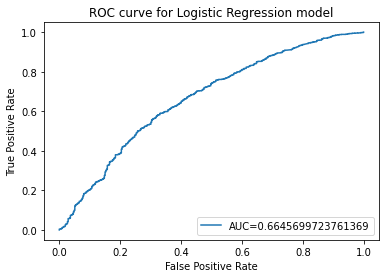

In [30]:
# DEFINE ROC CURVE METRICS
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# LOGISTIC REGRESSION MODEL ROC CURVE PLOT 
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Logistic Regression model')
plt.legend(loc=4)
plt.show()

## Decision tree model

- Hyperparameter Tunning

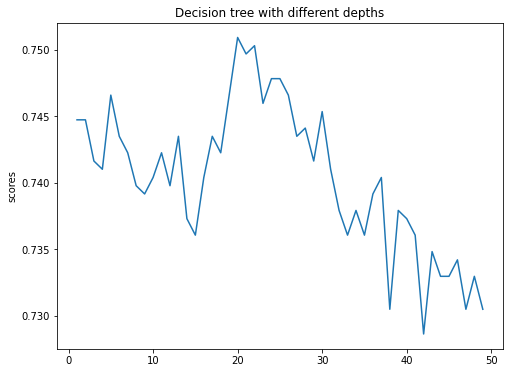

<Figure size 432x288 with 0 Axes>

In [31]:
scores = []

#--- HYPERPARAMETER TUNNING TO DECISION TREE MODEL
for i in range(1, 50):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))

#--- PLOT RESULTS FROM LAST TUNNING
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), scores)
plt.title("Decision tree with different depths")
plt.ylabel("scores")
plt.show()
plt.clf()

- Training model

In [32]:
#--- DECISION TREE MODEL AND TRAIN
tree_model = DecisionTreeClassifier(random_state=1, max_depth=20)
tree_model.fit(X_train, y_train)

print('O modelo de Arvore de Decisão tem {}'.format(round(tree.score(X_test, y_test), 2)*100), '%', 'de acuracia')

O modelo de Arvore de Decisão tem 73.0 % de acuracia


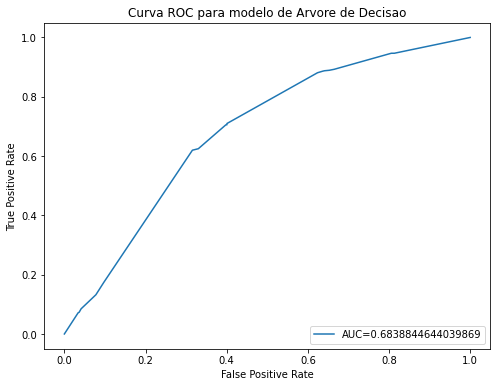

In [33]:
#--- DEFINE METRICS
y_pred_proba = tree_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#--- DECISION TREE ROC CURVE
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Curva ROC para modelo de Arvore de Decisao')
plt.legend(loc=4)
plt.show()

## Random Forest Classifier model

- Hyperparameter tunning

/tmp/ipykernel_129247/1941360759.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
/tmp/ipykernel_129247/1941360759.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
/tmp/ipykernel_129247/1941360759.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
/tmp/ipykernel_129247/1941360759.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
/tmp/ipykernel_129247/1941360759.py:9: DataConversionWarning: A column-vector y was passed when a 1d

A maior acuracia ocorre em 73 arvores


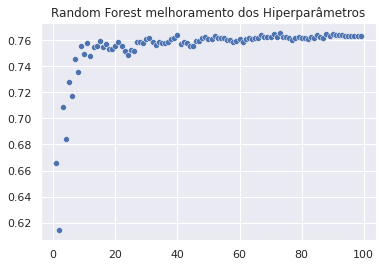

<Figure size 432x288 with 0 Axes>

In [34]:
#--- IMPORT LIB
from sklearn.ensemble import RandomForestClassifier

scores = []

#--- RANDOM FOREST HYPERPARAMETER TUNNING
for i in range(1, 100):
    forest = RandomForestClassifier(n_estimators=i, random_state=0)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))

print('A maior acuracia ocorre em {} arvores'.format(range(1, 100)[scores.index(max(scores))]))

#--- PLOT RESULTS FROM LAST TUNNING
sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(x=range(1, 100), y=scores)
plt.title('Random Forest melhoramento dos Hiperparâmetros')
plt.show()
plt.clf()

In [35]:
#--- RANDOM FOREST MODEL AND TRAIN
forest_model = RandomForestClassifier(n_estimators=73, random_state=0).fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

#--- PRINT RESULTS FROM OUR MODEL
print(classification_report(y_test, forest_predictions))

/tmp/ipykernel_129247/1661164151.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model = RandomForestClassifier(n_estimators=73, random_state=0).fit(X_train, y_train)


              precision    recall  f1-score   support

         0.0       0.60      0.25      0.35       412
         1.0       0.79      0.94      0.86      1202

    accuracy                           0.77      1614
   macro avg       0.69      0.60      0.60      1614
weighted avg       0.74      0.77      0.73      1614



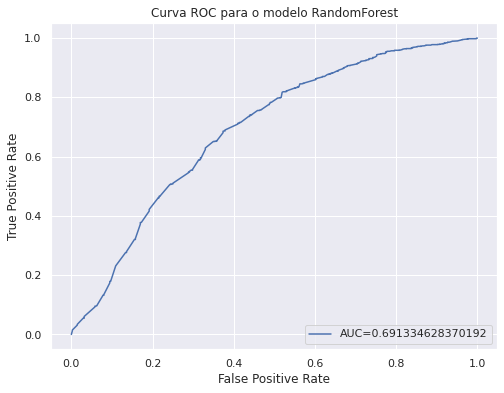

In [36]:
#--- DEFINE METRICS TO ROC CURVE
y_pred_proba = forest_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#--- PLOT ROC CURVE
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Curva ROC para o modelo RandomForest')
plt.legend(loc=4)
plt.show()

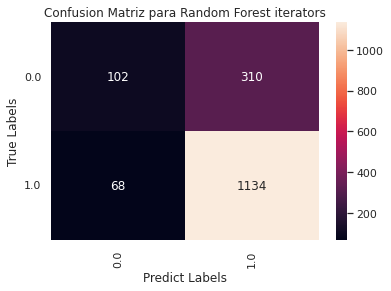

In [37]:
#--- CREATE CONFUSION MATRIX WITH OUR RESULTS
forest_confusion_matrix = confusion_matrix(y_test, forest_predictions)
forest_labels = forest_model.classes_

#--- PLOT CONFUSION MATRIX
ax = plt.subplot()
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(forest_confusion_matrix, annot=True, ax=ax, fmt='d')
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matriz para Random Forest iterators')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(forest_labels); 
ax.yaxis.set_ticklabels(forest_labels);